O objetivo do código é treinar um modelo através do algoritmo da Árvore de Decisão que irá definir com base em 13 diferentes aspectos
se determinado vinho é branco ou tinto. Para isso uma base de dados com informações 6497 vinhos diferentes será carregada.
80% dos dados serão usados para treinar o modelo e o restante para testá-lo.

The code's objective is to train a machine learning model using the Decision Tree algorithm that will define, based on 13 different aspects
if determined wine is white or red. For this, a database wich contains informations about different 6497 varietys of wine is loaded.
80% of the data will be used for training the model and the rest for test it.



Importando as bibliotecas:

Importing the libraries:


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier



Carregando a base de dados:

Loading the database:


In [2]:

data = pd.read_csv('wine_dataset.csv')

data.head(10)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red



Separando a base de dados em alvo (a cor/classe do vinho) e os preditores (os parâmetros):

Spliting the database into target (the color/class of the wine) and the predictors (the parameters):


In [3]:

target = data.iloc[:, 12]
predictors = data.iloc[:,0:12]



Todos os parâmetros preditórios são numéricos, porém a meta é do tipo 'texto'. Então os valores da classe de vinhos tinto serão classificados como 1 e os brancos como 0:

   All of the predictory parameters are numeric, but the target has the type 'string'. So the values of 'red' wine class will be classified as 1 and the 'white' ones as 0:


In [4]:

target = target.replace('red', 0)
target = target.replace('white', 1)



É interessante verificar se existe algum outro valor na coluna da meta além de 1 e 0:

It's interesting to verify if there's other value in the target column besides 1 and 0:


In [5]:

target.value_counts()


1    4898
0    1599
Name: style, dtype: int64


Os previsores precisam ser escalonados para melhorar a eficiencia do modelo:

The predictors need to be staggered to increase the model's eficiency:


In [6]:

scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)


 
  O alvo e os preditores são separados em dados de treinamento e teste. O teste corresponde a 20% do número total de linhas da Base de Dados original:
 
  The target and the predictors are both separeted in training and testing data. The test size has 20% of the total number of rows in the original Database:
  

In [7]:

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.2)


 
 Uma vez que os dados são modelados e divididos corretamente, o algoritmo Extra Tree Classifier é importado,
no qual os bancos de dados de treinamento (preditores e alvo) são ajustados:

  Once the data are correctly modeled and divided the Extra Tree Classifier algorithm is imported,
in which the training databases (predictors and target) are applied:


In [8]:

model = ExtraTreesClassifier()
model.fit(predictors_train, target_train)
predictions = model.predict(predictors_test)


   
   Para medir a precisão da classificação do modelo, é necessário comparar as previsões feitas por ele,
aplicando o predictors_test no modelo, e comparando suas previsões com o target_test:
   
   In order to measure the model's classification accuracy, is needed to compare the predictions made by it,
applying the predictors_test in the model, and comparing its predictions with the target_test:


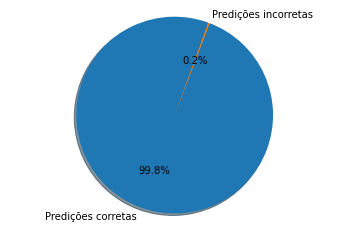

In [9]:
precision = accuracy_score(target_test, predictions)
labels = 'Predições corretas', 'Predições incorretas'
sizes = [precision, 1-precision] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=70, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()



A precisão do modelo é em torno de 99,20%.

The accuracy of the model is about 99,20%.
